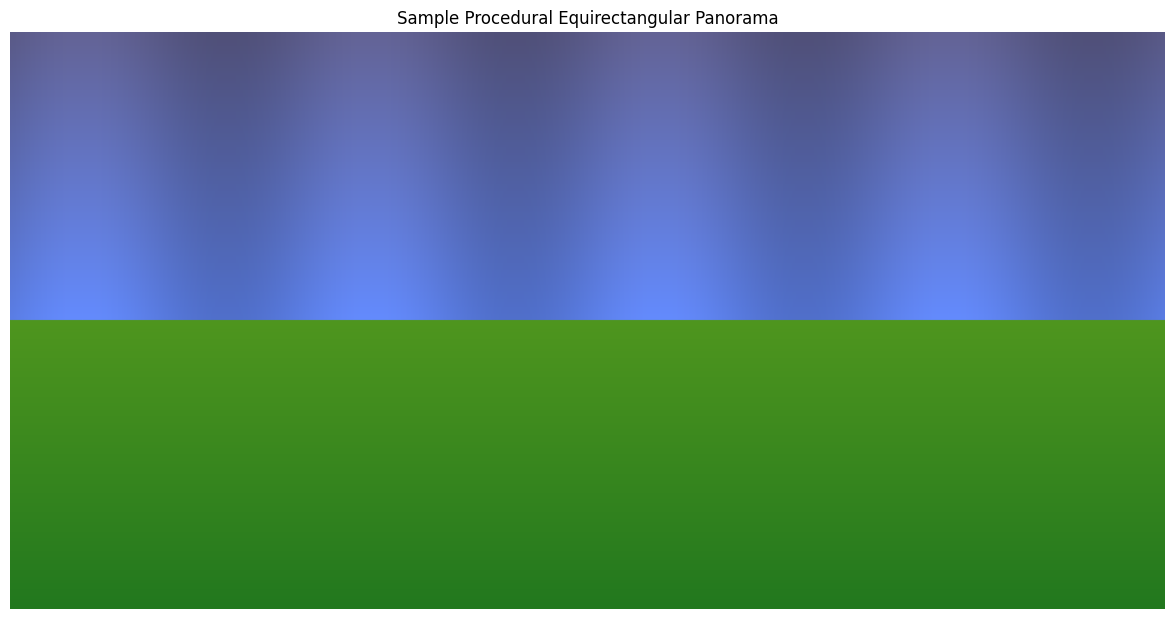

In [2]:
# Create a simple procedural panorama image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create a gradient panorama
width, height = 2048, 1024
panorama_array = np.zeros((height, width, 3), dtype=np.uint8)

# Create a gradient sky (top half)
for y in range(height//2):
    blue_value = 150 + int(105 * (y / (height/2)))
    panorama_array[y, :, 0] = 100  # R
    panorama_array[y, :, 1] = 100 + int(40 * (y / (height/2)))  # G
    panorama_array[y, :, 2] = blue_value  # B

# Create a gradient ground (bottom half)
for y in range(height//2, height):
    rel_y = (y - height//2) / (height/2)
    panorama_array[y, :, 0] = 34 + int(45 * (1-rel_y))  # R
    panorama_array[y, :, 1] = 120 + int(30 * (1-rel_y))  # G
    panorama_array[y, :, 2] = 30  # B

# Add some horizontal variation
for x in range(width):
    factor = 0.5 + 0.5 * np.sin(x / width * 8 * np.pi)
    panorama_array[:height//2, x, :] = (panorama_array[:height//2, x, :] * (0.8 + 0.2 * factor)).astype(np.uint8)
    
# Convert to PIL Image
panorama_img = Image.fromarray(panorama_array)

# Display sample panorama
plt.figure(figsize=(15, 7.5))
plt.imshow(panorama_img)
plt.title("Sample Procedural Equirectangular Panorama")
plt.axis('off')
plt.show()